Found 10 images in 'Photos' directory

[1/10] Processing: 1.jpg


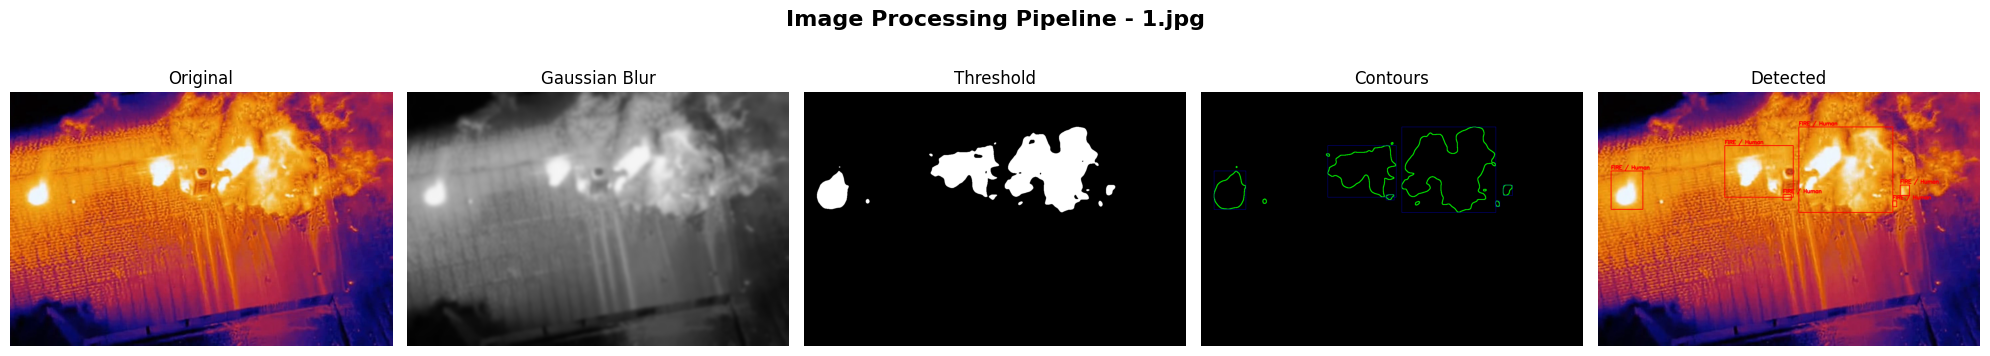


[2/10] Processing: 10.jpg


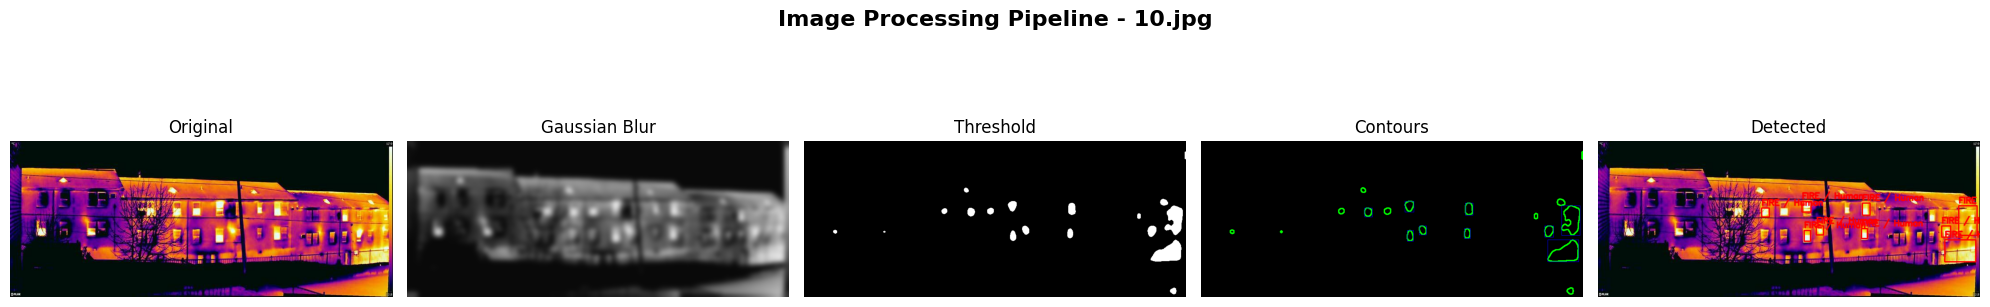


[3/10] Processing: 2.jpg


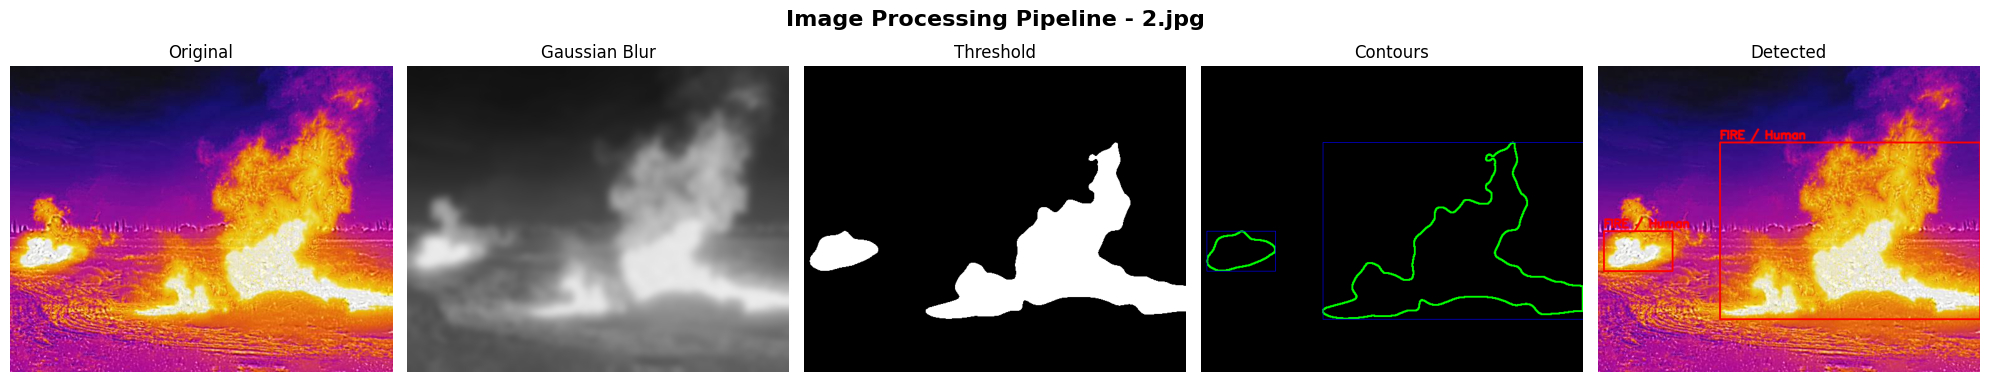


[4/10] Processing: 3.jpg


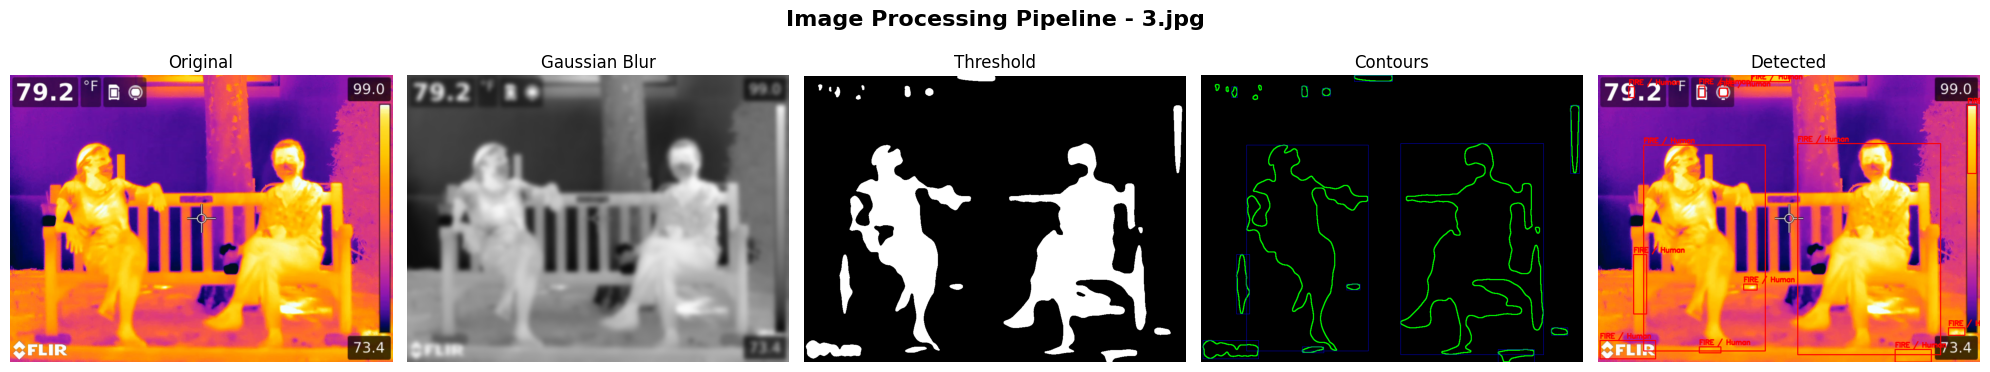


[5/10] Processing: 4.jpg


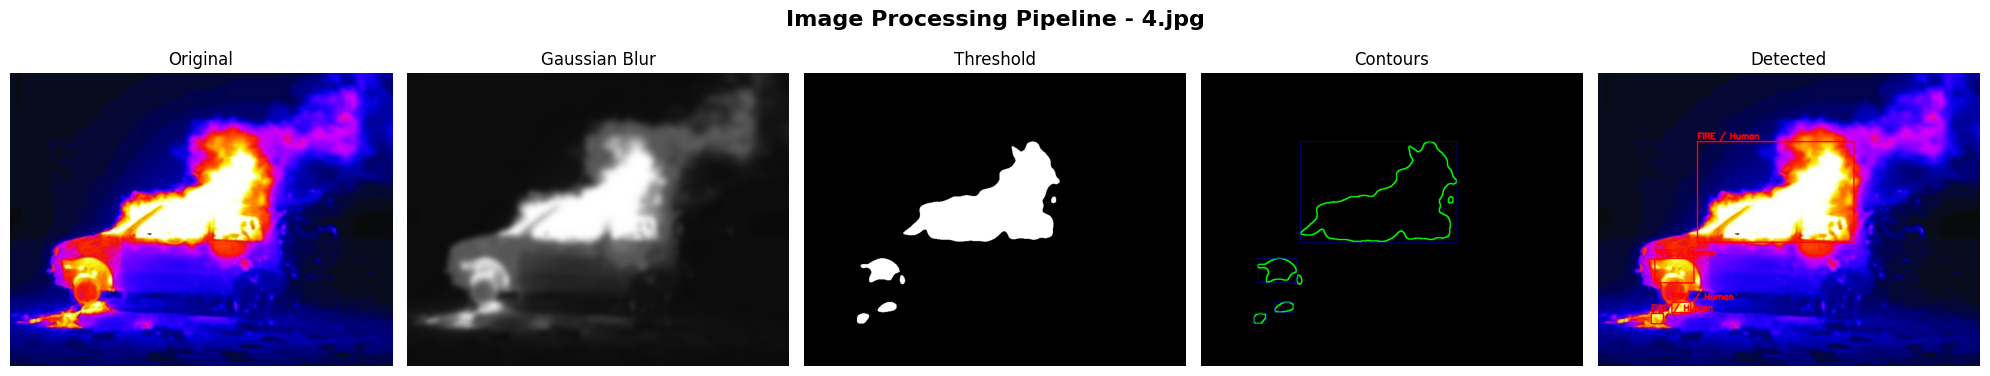


[6/10] Processing: 5.jpg


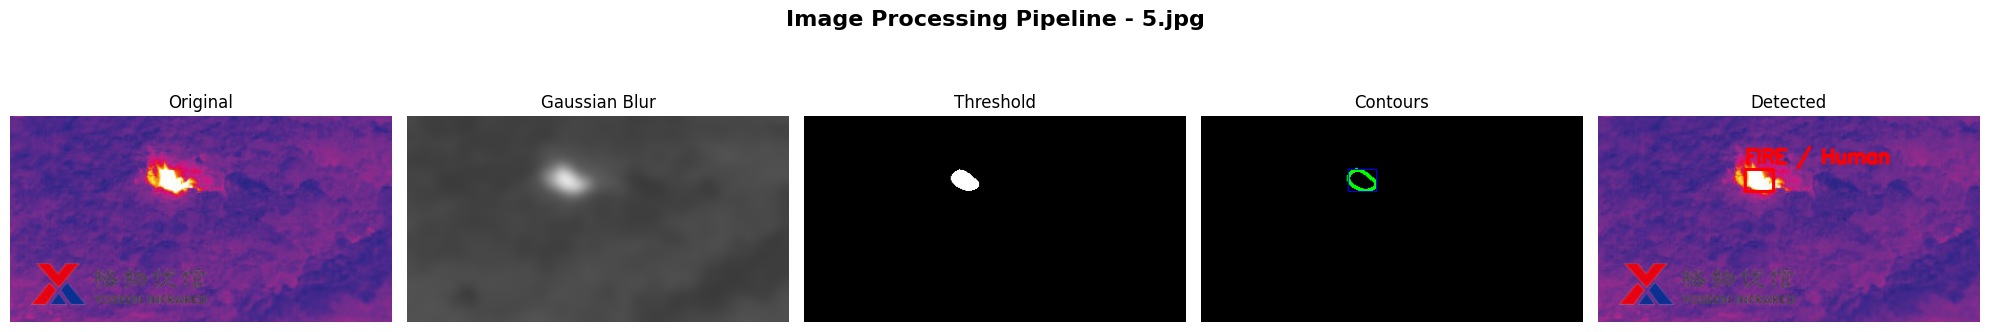


[7/10] Processing: 6.jpg


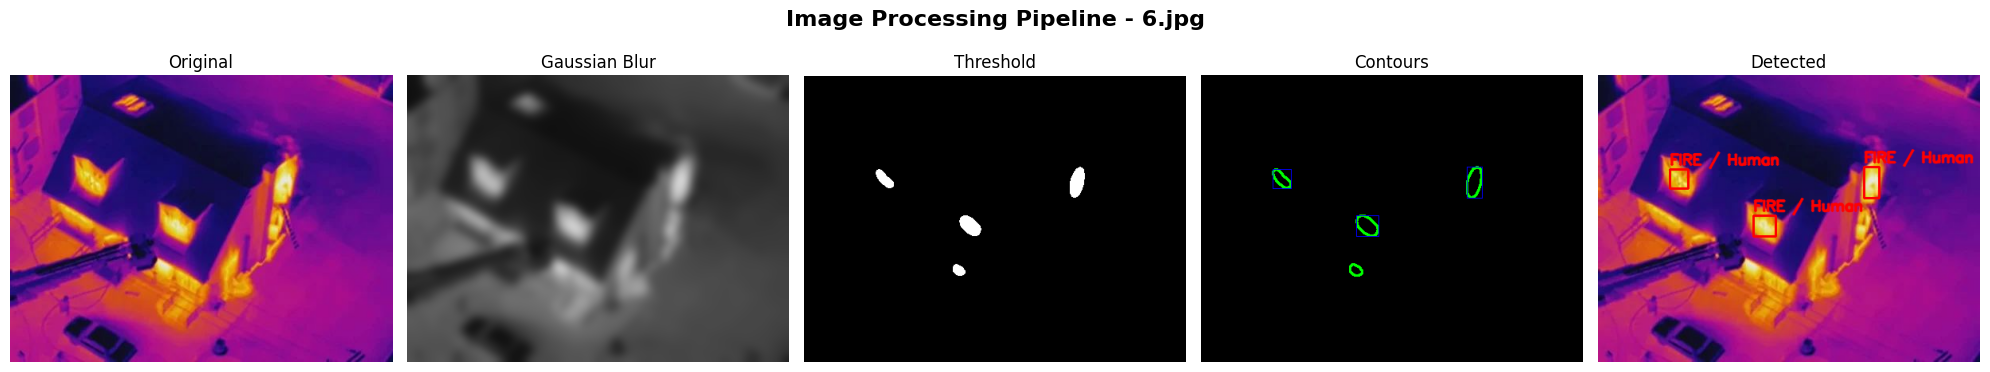


[8/10] Processing: 7.jpg


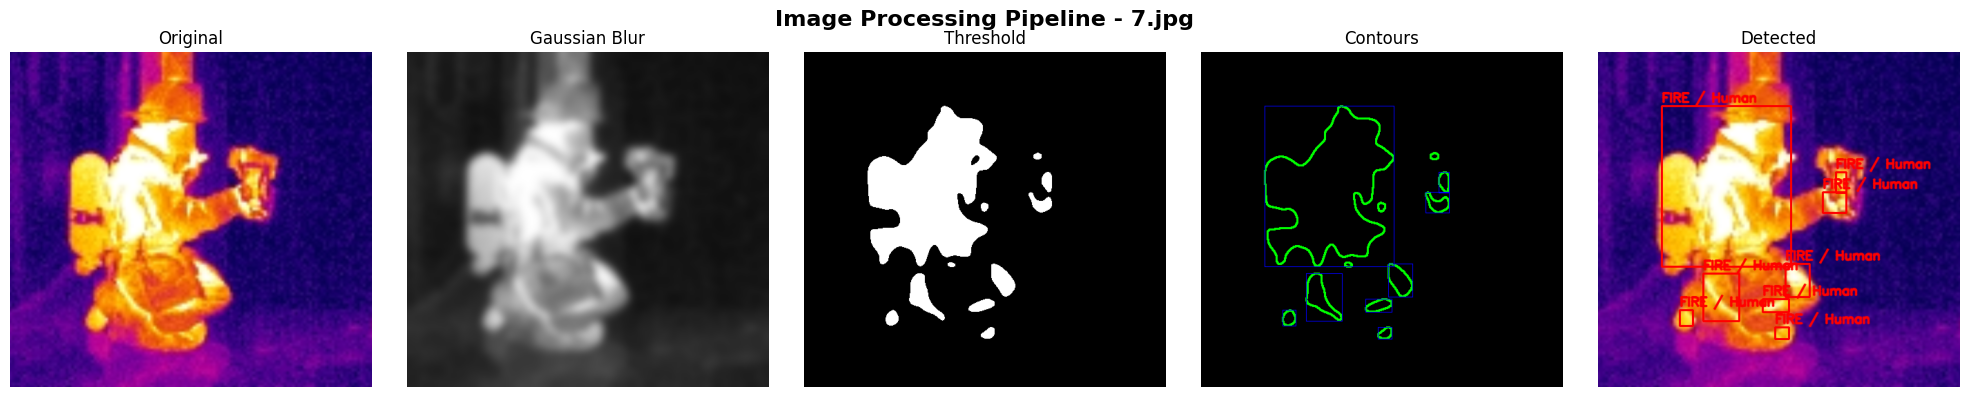


[9/10] Processing: 8.jpg


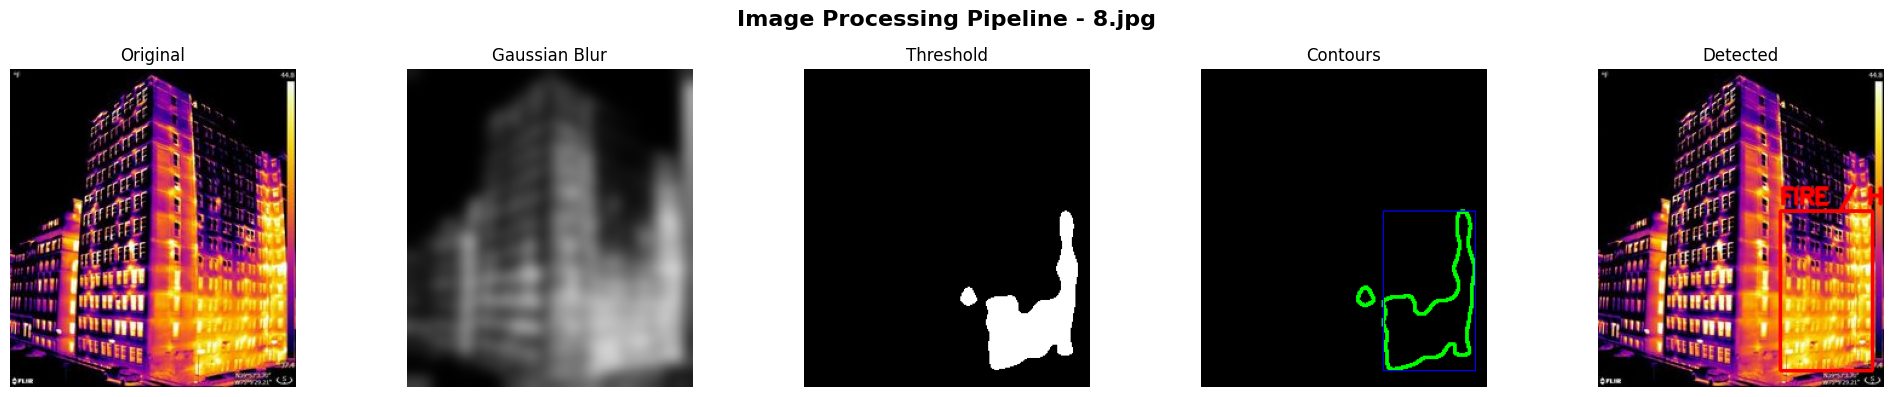


[10/10] Processing: 9.jpg


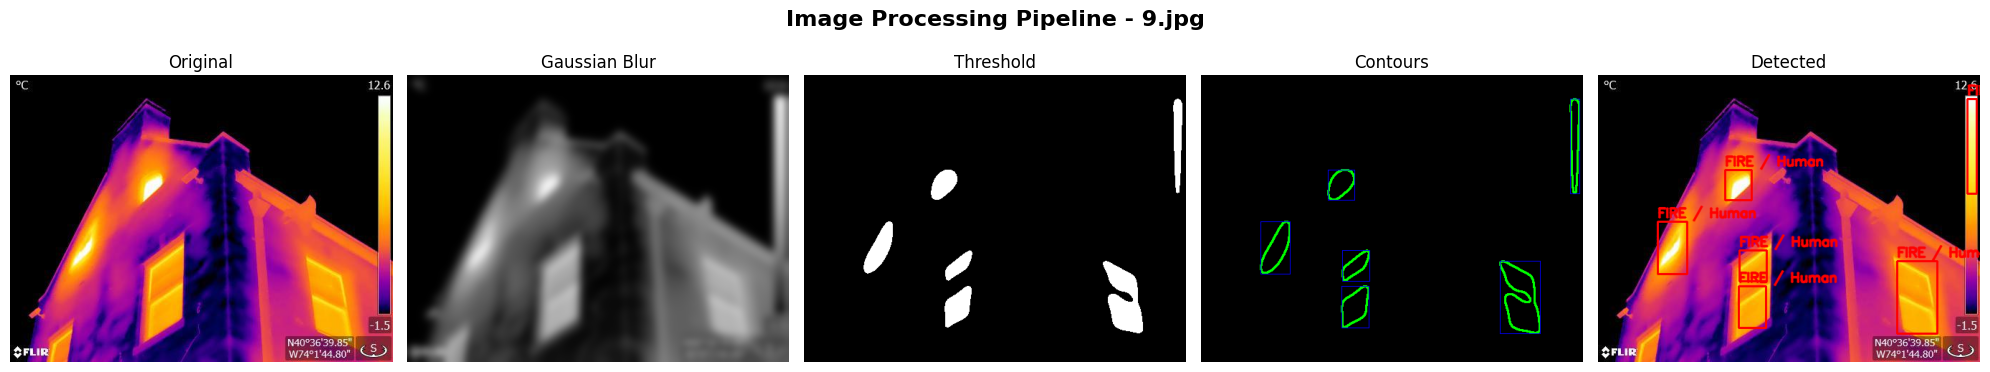

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def process_image(input_filename):
	image = cv2.imread(input_filename)
	if image is None:
		print(f"Error: failed to read image '{input_filename}'")
		return None

	# Gaussian blur and threshold
	gray_blur = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (35, 35), 0)
	_, th = cv2.threshold(gray_blur, 170, 255, cv2.THRESH_BINARY)
	
	# Morphological opening to clean noise
	mask = cv2.morphologyEx(th, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

	# Find and filter contours
	contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	boxes = []
	for cnt in contours:
		area = cv2.contourArea(cnt)
		if area < 200:
			continue
		x, y, w, h = cv2.boundingRect(cnt)
		boxes.append((x, y, w, h))

	# Create visualization panels
	display_blur = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
	display_th = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
	
	# Contour visualization
	display_contour = np.zeros_like(image)
	cv2.drawContours(display_contour, contours, -1, (0, 255, 0), 2)
	for x, y, w, h in boxes:
		cv2.rectangle(display_contour, (x, y), (x + w, y + h), (255, 0, 0), 1)
	
	# Detection visualization
	display_fire = image.copy()
	for x, y, w, h in boxes:
		cv2.rectangle(display_fire, (x, y), (x + w, y + h), (0, 0, 255), 2)
		cv2.putText(display_fire, "FIRE / Human", (x, max(y - 6, 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

	# Convert BGR to RGB for matplotlib
	panels = [
		cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_blur, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_th, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_contour, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_fire, cv2.COLOR_BGR2RGB)
	]
	
	return panels, os.path.basename(input_filename)


def main():
	photos_dir = "Photos"
	
	# Get all image files from Photos directory
	if not os.path.exists(photos_dir):
		print(f"Error: '{photos_dir}' directory not found")
		return
	
	image_files = [f for f in os.listdir(photos_dir) 
	               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
	
	if not image_files:
		print(f"No image files found in '{photos_dir}' directory")
		return
	
	image_files.sort()
	print(f"Found {len(image_files)} images in '{photos_dir}' directory\n")
	
	titles = ['Original', 'Gaussian Blur', 'Threshold', 'Contours', 'Detected']
	
	# Process each image
	for idx, filename in enumerate(image_files, 1):
		filepath = os.path.join(photos_dir, filename)
		print(f"[{idx}/{len(image_files)}] Processing: {filename}")
		
		result = process_image(filepath)
		if result is None:
			continue
		
		panels, basename = result
		
		# Display panels side by side
		fig, axes = plt.subplots(1, 5, figsize=(20, 4))
		fig.suptitle(f'Image Processing Pipeline - {basename}', fontsize=16, fontweight='bold')
		
		for ax, panel, title in zip(axes, panels, titles):
			ax.imshow(panel)
			ax.set_title(title, fontsize=12)
			ax.axis('off')
		
		plt.tight_layout()
		plt.show()
		print()

if __name__ == "__main__":
	main()